In [21]:
import pandas as pd

In [22]:
true = pd.read_csv('True.csv')

In [23]:
true.head(3)

,title,text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...


In [24]:
fake = pd.read_csv('Fake.csv')
fake = fake.iloc[:,0:2]

C:\Users\saidi\AppData\Local\Temp\ipykernel_7592\3660637155.py:1: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149) have mixed types. Specify dtype option on import or set low_memory=False.
  fake = pd.read_csv('Fake.csv')


In [25]:
fake.head(3)

,title,text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk..."


In [26]:
true.shape

(21417, 2)

In [27]:
fake.shape

(23565, 2)

In [28]:
true['label'] = 1

In [29]:
true.head(3)

,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1


In [30]:
fake['label'] = 0

In [31]:
fake.head(3)

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0


In [32]:
frames = [true.loc[0:5000][:], fake.loc[0:5000][:]]
df = pd.concat(frames)

In [33]:
df.shape

(10002, 3)

In [34]:
df = df.sample(frac=1).reset_index(drop=True)

In [35]:
df.head()

,title,text,label
0,Trump says Senate should have passed healthcar...,"BRENTWOOD, N.Y. (Reuters) - U.S. President Don...",1
1,EU's Juncker says ready to retaliate if needed...,BRUSSELS (Reuters) - The European Union’s chie...,1
2,REPORT: Fox News Might Be Under Investigation...,If federal authorities discover what they are ...,0
3,It Took A Scathing Letter From Canada’s Prime...,Fox News couldn t wait to try to spin the Queb...,0
4,AG Sessions Toys With Ending Russia Investiga...,Those who know anything about Nixon know this ...,0


In [36]:
X = df.drop('label', axis=1)

In [37]:
y = df['label']

In [38]:
df = df.dropna()

In [39]:
messages = df.copy()

In [40]:
messages.reset_index(inplace=True)

In [41]:
messages.head()

,index,title,text,label
0,0,Trump says Senate should have passed healthcar...,"BRENTWOOD, N.Y. (Reuters) - U.S. President Don...",1
1,1,EU's Juncker says ready to retaliate if needed...,BRUSSELS (Reuters) - The European Union’s chie...,1
2,2,REPORT: Fox News Might Be Under Investigation...,If federal authorities discover what they are ...,0
3,3,It Took A Scathing Letter From Canada’s Prime...,Fox News couldn t wait to try to spin the Queb...,0
4,4,AG Sessions Toys With Ending Russia Investiga...,Those who know anything about Nixon know this ...,0


In [42]:
messages['title'][2]

' REPORT: Fox News Might Be Under Investigation By Federal Authorities'

In [43]:
messages['text'][2]

'If federal authorities discover what they are reportedly looking for, the Republican propaganda network could be in deep sh*t.Last year, Roger Ailes was ousted as Fox News boss because Gretchen Carlson and other female anchors filed sexual harassment lawsuits.According to Carlson s lawsuit, Ailes punished her after she refused to have sex with him. He constantly ogled her and told her to wear short skirts to emphasize her legs. He also allowed misogyny to run rampant. Carlson even named current Fox & Friends host Steve Doocy in the lawsuit.First, Ailes demoted Carlson by removing her from Fox & Friends. And then he fired her after she continued to refuse to sleep with him to further her career.The case against Ailes was so damning that even Megyn Kelly defended Carlson.Eventually, Ailes settled the lawsuit and Fox News paid Carlson $20 million. Ailes was then fired by the company and given a $40 million severance package.And that money is the source of a possible investigation that fe

### Preprocessing

In [44]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [45]:
import re
import nltk
nltk.download('stopwords')

corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saidi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
len(corpus)

10002

In [47]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_v = TfidfVectorizer(max_features=5000, ngram_range=(1,3))

In [48]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [49]:
X = tfidf_v.fit_transform(corpus).toarray()
y = messages['label']

In [50]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [52]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names_out())
count_df.head(3)

,abandon,abc,abc news,abe,abil,abl,abort,abroad,absolut,absurd,...,york reuter,york time,york time report,young,young peopl,younger,youtub,zero,zink,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.045102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Passive Aggressive Classifier - Baseline

In [53]:
from sklearn.linear_model import PassiveAggressiveClassifier
classifier = PassiveAggressiveClassifier(max_iter=1000)

In [54]:
from sklearn import metrics
import numpy as np
import itertools

classifier.fit(X_train, y_train)

pred = classifier.predict(X_test)

score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   1.000


In [55]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


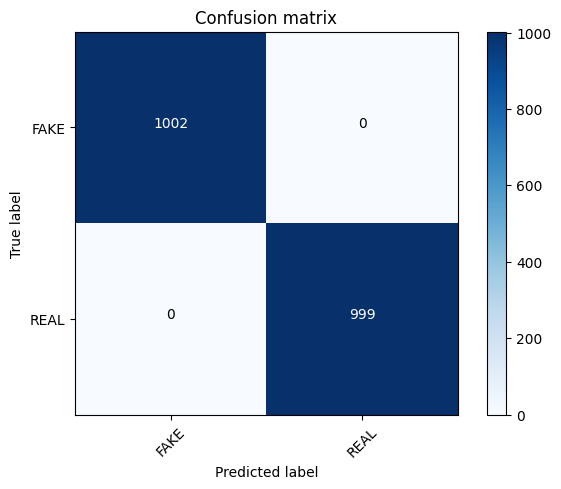

In [56]:
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [57]:
classifier.predict(X_test)

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

### Preprocess and transform datapoint text (true['text'][16888]) and try to predict it based on the model

In [58]:
review = re.sub('[^a-zA-Z]', ' ', true['text'][16888])
review = review.lower()
review = review.split()
    
review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)
review

'cairo reuter three polic offic kill eight other injur shoot raid suspect milit hideout giza southwest egyptian capit two secur sourc said friday sourc said author follow lead apart thought hous eight suspect member hasm group claim sever attack around capit target judg policemen sinc last year suspect milit fled exchang fire sourc said egypt accus hasm milit wing muslim brotherhood islamist group outlaw muslim brotherhood deni islamist insurg sinai peninsula grown sinc militari overthrew presid moham mursi muslim brotherhood mid follow mass protest rule milit group stage insurg pledg allegi islam state blame kill hundr soldier policemen start target area includ egypt christian copt'

In [59]:
val = tfidf_v.transform([review]).toarray()

In [61]:
pd.DataFrame(val, columns=tfidf_v.get_feature_names_out())

,abandon,abc,abc news,abe,abil,abl,abort,abroad,absolut,absurd,...,york reuter,york time,york time report,young,young peopl,younger,youtub,zero,zink,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
classifier.predict(val)

array([1], dtype=int64)